# Part I - (Ford GoBike System Data)
## by (Caleb Okon)

## Introduction
>  This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. information collated in this dataset includes the following 'duration_sec', 'start_time', 'end_time', 'start_station_id','start_station_name','start_station_latitude','start_station_longitude','end_station_id','end_station_name','end_station_latitude','end_station_longitude','bike_id','user_type','member_birth_year','member_gender' and 'bike_share_for_all_trip'

 



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly as px
%matplotlib inline



In [2]:
# load in the dataset 
bike=pd.read_csv('201902-fordgobike-tripdata.csv')

## Assessing data

### Visual assessment

In [3]:
#glimpse of the first 10 data in the data set
bike.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [4]:
#glimpse of the last 10 data
bike.tail(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183402,122,2019-02-01 00:17:32.2580,2019-02-01 00:19:34.9380,119.0,18th St at Noe St,37.761047,-122.432642,120.0,Mission Dolores Park,37.761420,-122.426435,4326,Subscriber,NaN,NaN,No
183403,249,2019-02-01 00:15:12.0670,2019-02-01 00:19:21.6990,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,4642,Subscriber,2000.0,Male,No
183404,256,2019-02-01 00:12:50.5540,2019-02-01 00:17:07.3620,241.0,Ashby BART Station,37.852477,-122.270213,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,4845,Subscriber,1980.0,Male,Yes
183405,111,2019-02-01 00:14:49.8740,2019-02-01 00:16:41.3010,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,19.0,Post St at Kearny St,37.788975,-122.403452,4832,Subscriber,1984.0,Male,No
183406,706,2019-02-01 00:04:40.6160,2019-02-01 00:16:27.0800,138.0,Jersey St at Church St,37.750900,-122.427411,78.0,Folsom St at 9th St,37.773717,-122.411647,5017,Subscriber,1988.0,Male,No
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


### Programatic assessment

In [5]:
#datatype of each column
bike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
# Names of each column
list(bike.columns.values)


['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip']

In [7]:
#shape of the dataset

bike.shape

(183412, 16)

In [8]:
# description of the dataset
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [10]:
#check for null value for each column
bike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [11]:
#check for duplicated rows
bike.duplicated().sum()

0

In [12]:
# Number of unique start stations
bike.start_station_name.nunique()

329

In [13]:
# number of unique end station
bike.end_station_name.nunique()

329

In [14]:
# number of unique bikes in the dataset
bike.bike_id.nunique()

4646

#### Quality issues

1. Start_time and End_time columns carries objects as datatype instead of Datetime
2. bike_id column carries INT64 as datatype
3. user_type carries object as datatype
4. Drop the following irrelevant column because they will not be needed for this analysis which are start_station_id, end_station_id columns, start_station_latitude, start_station_longitude, end_station_latitude, End_station_longitude, member_birth_year, member_gender and bike_share for all trips.


#### Tidiness Issues

1. separate columns containing multiple data to new different columns

## Data cleaning

The following processes will be used to clean the data
1. Define
2. Code
3. Test

In [15]:
#First i will copy the data
df=bike.copy()

### Issue #1

The issues stated in 1, 2 and 3 will be done together since they require the same process

#### Define

Change the column datatype to correspond with the content

#### Code

In [16]:
dtype={'start_time':'datetime64',
      'end_time':'datetime64',
      'bike_id': 'object',
      'user_type': 'category'}
df=df.astype(dtype)



#### Test

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null object
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: category(1), datetime64[ns](2), float64(7), int64(1), obj

### Issue #2

#### Define

Drop the following irrelevant column because they will not be needed for this analysis which are start_station_id, end_station_id, start_station_latitude, start_station_longitude, end_station_latitude, End_station_longitude, member_birth_year, member_gender and bike_share_for_all_trips.

#### Code

In [18]:
df.drop(['start_station_id', 'end_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip'], axis=1, inplace= True)

#### Test

In [19]:
list(df.columns)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_name',
 'end_station_name',
 'bike_id',
 'user_type']

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 7 columns):
duration_sec          183412 non-null int64
start_time            183412 non-null datetime64[ns]
end_time              183412 non-null datetime64[ns]
start_station_name    183215 non-null object
end_station_name      183215 non-null object
bike_id               183412 non-null object
user_type             183412 non-null category
dtypes: category(1), datetime64[ns](2), int64(1), object(3)
memory usage: 8.6+ MB


### Tidiness Issues #1

#### Define

break column containing more than one information into different columns

#### Code

In [21]:
# new useful columns

# from Start_time column 
df['start_month']=df.start_time.dt.month
df['start_weekday']= df.start_time.dt.weekday
df['start_hour']= df.start_time.dt.hour

#from end_time

df['end_hour']= df.end_time.dt.hour

# from duration_sec
df['duration_minutes']= df['duration_sec']/60


#### Test

In [86]:
df.dtypes

duration_sec                   int64
start_time            datetime64[ns]
end_time              datetime64[ns]
start_station_name            object
end_station_name              object
bike_id                       object
user_type                   category
start_month                    int64
start_weekday                  int64
start_hour                     int64
end_hour                       int64
duration_minutes             float64
dtype: object

In [22]:
df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,start_month,start_weekday,start_hour,end_hour,duration_minutes
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,2,3,17,8,869.750000
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,2,3,18,6,708.683333
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,2,3,12,5,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,2,3,17,4,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,2,3,23,0,26.416667


### What is the structure of your dataset?

> After cleaning the data, the dataset now contains 7 columns and 183412 rows, which consists of category(1), datetime64[ns](2), int64(1), object(3).
the names and datatype of the columns are;
'duration_sec'(Int)
 'start_time'(datetime)
 'end_time'(datetime)
 'start_station_name'(object)
 'end_station_name'(object)
 'bike_id'(object)
 'user_type'(categories)

### What is/are the main feature(s) of interest in your dataset?

> The main features are duration_sec, start_time and user_type

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Since all seemingly uneccesary data has been dropped, all remaining datas will be useful.

## Univariate Exploration




### Types and number of bicycle service users

In [23]:
# check the types of user

df.user_type.unique()

[Customer, Subscriber]
Categories (2, object): [Customer, Subscriber]

Text(0.5,1,'User_Type by numbers')

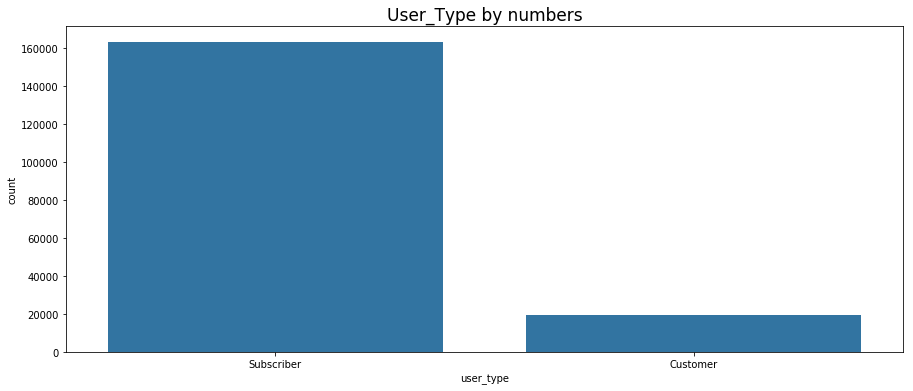

In [24]:
#show number of users using countplot

plt.figure(figsize=[15,6])
base_color= sb.color_palette()[0]


cat_comp=df['user_type'].value_counts().index
sb.countplot(data=df, x='user_type',color=base_color, order=cat_comp)
plt.title('User_Type by numbers', fontsize=17)

### Plotting pie chart to show the user type by percentage

Text(0.5,1,'User_type by percentage')

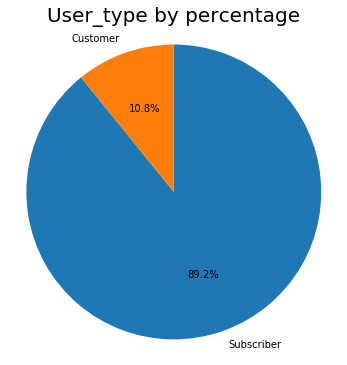

In [25]:
plt.figure(figsize=(10,6))
sorted_counts= df['user_type'].value_counts()
plt.pie(sorted_counts, labels=sorted_counts.index, startangle = 90, counterclock = False, autopct= '%1.1f%%');
plt.axis('square');
plt.title('User_type by percentage', fontsize=20)

from the visualization we can see that with a percentage of 89.2% subscibers made more rides



### most popular stations in the dataset

#### start_station

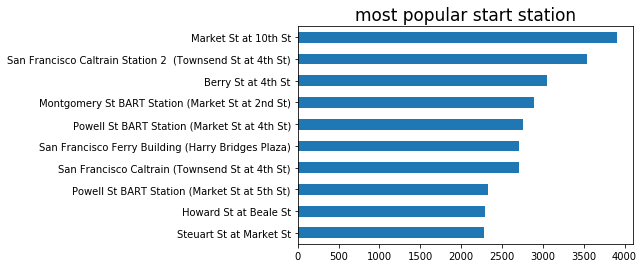

In [26]:
# plot an horizontal chart that displays the top 10 most popular start station
plt.title('most popular start station', fontsize=17)
df.start_station_name.value_counts(ascending= True).tail(10).plot.barh(color=base_color);
base_color= sb.color_palette()[0]

From the above, we can see that market St at 10th St is the most popular start station followed closely by san francisco caltrain station 2(townsend St at 4th St)

#### End_station

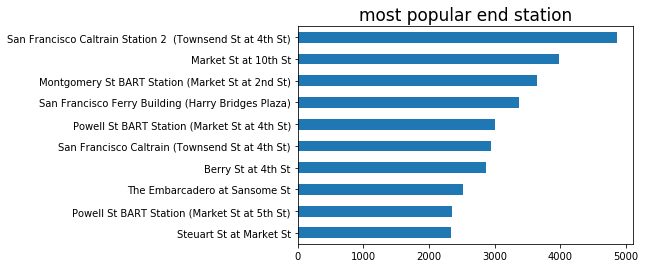

In [27]:
# plot a horizontal barchart that display the top 10 end stations
plt.title('most popular end station', fontsize=17)
df.end_station_name.value_counts(ascending= True).tail(10).plot.barh(color=base_color);
base_color= sb.color_palette()[0]

from the above visualization we see that san francisco caltrain station 2 (Townsend St at 4th St)

### Most rarely used station

#### start_station

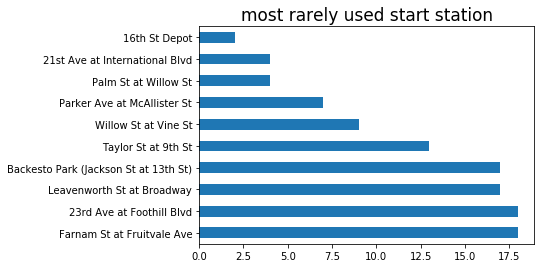

In [28]:
# plot a horizontal barchart that displays the top 10 rarely used station
plt.title('most rarely used start station', fontsize=17)
df.start_station_name.value_counts(ascending= False).tail(10).plot.barh( color=base_color);
base_color= sb.color_palette()[0]

from the above it is clear that 16th st depot is the most rarely used start station

#### End_station

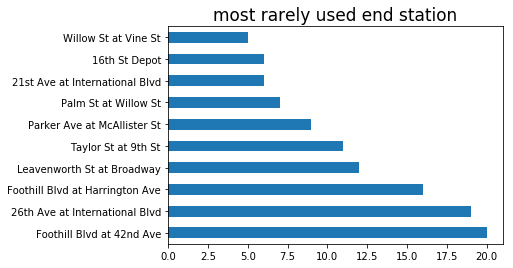

In [29]:
# top 10 most popular end station 
plt.title('most rarely used end station', fontsize=17)
df.end_station_name.value_counts(ascending= False).tail(10).plot.barh( color=base_color);
base_color= sb.color_palette()[0]

from the visualization, it is clear that willow St at vine St is the most rarely used end station.

### Trip Duration

In [30]:
# overall trip duration in minutes 

df.duration_minutes.describe()

count    183412.000000
mean         12.101307
std          29.906496
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_minutes, dtype: float64

From the above we can see that the trip average is 12.1 minute

next we use histogram to how long most trips last

Text(0.5,1,'Trip Duration')

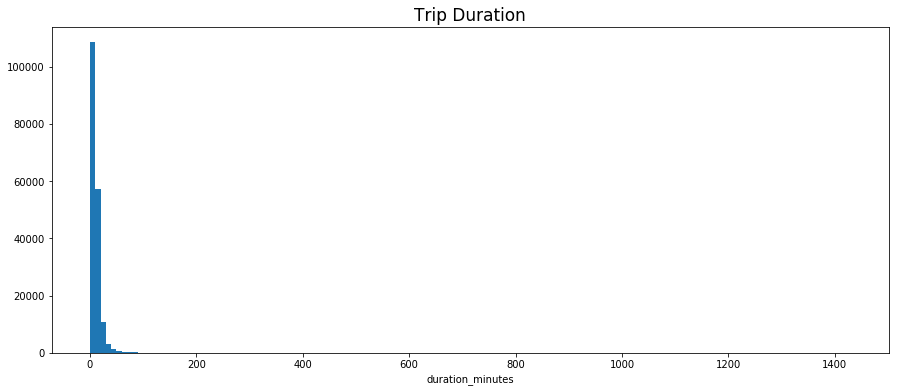

In [31]:
plt.figure(figsize=[15,6])
bin_edges = np.arange(0, df.duration_minutes.max()+10, 10)
plt.hist(data=df, x='duration_minutes', bins= bin_edges)
plt.xlabel('duration_minutes');
plt.title('Trip Duration', fontsize=17)

for better visualization, a logarithmic scale transformation will be applied.

Text(0.5,1,'Duration time in minutes')

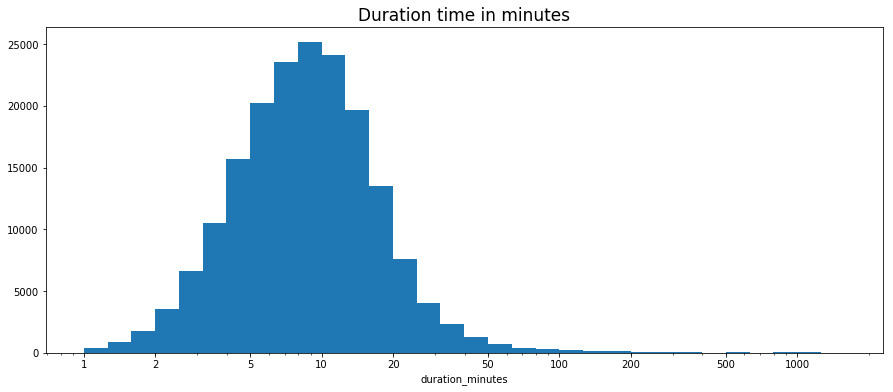

In [32]:
plt.figure(figsize=[15,6])
bin_edges = 10 **np.arange(0.0, np.log10(df.duration_minutes.max())+0.1, 0.1)
plt.hist(data=df, x='duration_minutes', bins= bin_edges)
plt.xlabel('duration_minutes');
plt.xscale('log')
tick_locs=[1,2,5,10,20,50,100,200,500,1000]
plt.xticks(tick_locs, tick_locs)
plt.title('Duration time in minutes', fontsize=17)

from the above viz we can see that majority of the rides took 7-13 minutes. and ony few riders rides for more than 60minutes i.e 1 hour

#### Month and week with most rides

##### Start month

Text(0.5,1,'Month with most rides')

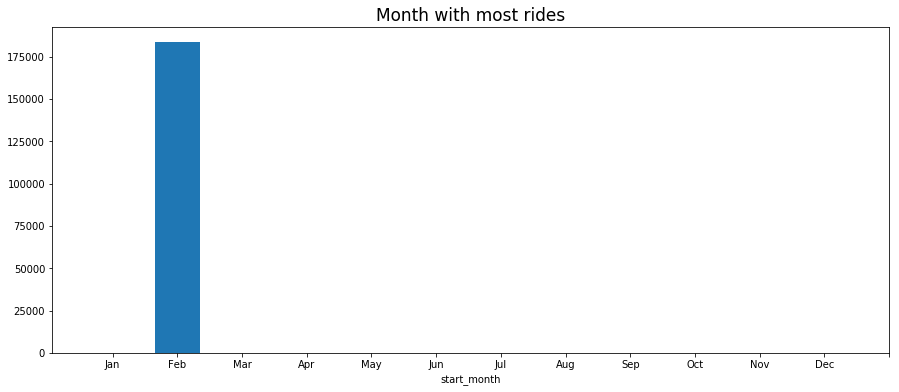

In [33]:
# introduce a month label that will be used for plotting

month_labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']

# plotting a histogram to visually view the month with most rides

plt.figure(figsize=[15,6])
bin_edges=np.arange(0.5,12.5+1, 1)
plt.hist(data=df, x = 'start_month', bins=bin_edges, rwidth=0.7)
plt.xticks(np.arange(1,12.5+1, 1),month_labels)
plt.xlabel('start_month')
plt.title('Month with most rides', fontsize=17)

From the above viz, it seems that only data from february are present in the Start_month column of the dataset, i will investigate further using the sample function.

In [34]:
df['start_month'].sample(200)

109316    2
6656      2
117996    2
113505    2
79630     2
117702    2
43207     2
182039    2
40843     2
134823    2
3133      2
69509     2
180845    2
37874     2
171542    2
139193    2
17697     2
142702    2
175088    2
6472      2
102685    2
157877    2
176277    2
130258    2
124921    2
147923    2
170259    2
19824     2
119439    2
139318    2
         ..
135983    2
151745    2
17322     2
138644    2
52636     2
60228     2
8537      2
155233    2
174265    2
103472    2
180823    2
136757    2
143422    2
114379    2
54132     2
134766    2
8978      2
119325    2
4830      2
51275     2
23496     2
156253    2
119045    2
124909    2
109833    2
142851    2
15541     2
139782    2
37678     2
16690     2
Name: start_month, Length: 200, dtype: int64

This comfirms my hypothesis

##### End_month

Text(0.5,1,'Days of Ride')

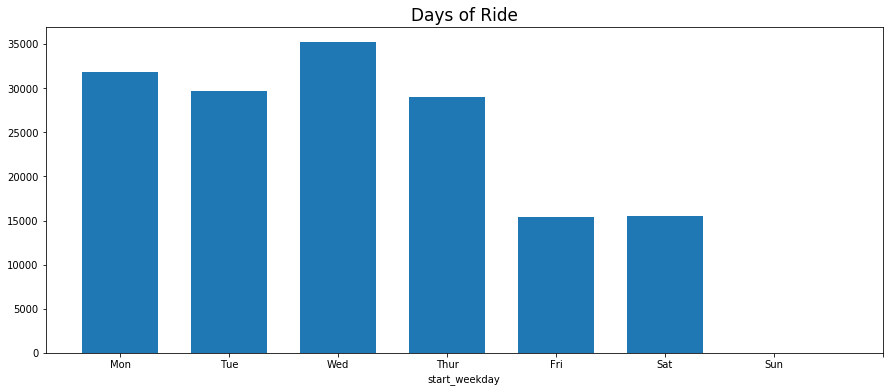

In [35]:
# introduce a month label that will be used for plotting

week_labels=['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

# plotting a histogram to visually view the month with most rides

plt.figure(figsize=[15,6])
bin_edges=np.arange(0.5,7.5+1, 1)
plt.hist(data=df, x = 'start_weekday', bins=bin_edges, rwidth=0.7)
plt.xticks(np.arange(1,7.5+1, 1),week_labels)
plt.xlabel('start_weekday')
plt.title('Days of Ride', fontsize=17)

from the above visualization, it is clear that most of the rides happened on wednesday

#### Hour with most rides

##### Start_hour

Text(0.5,1,'Hours of Start Ride')

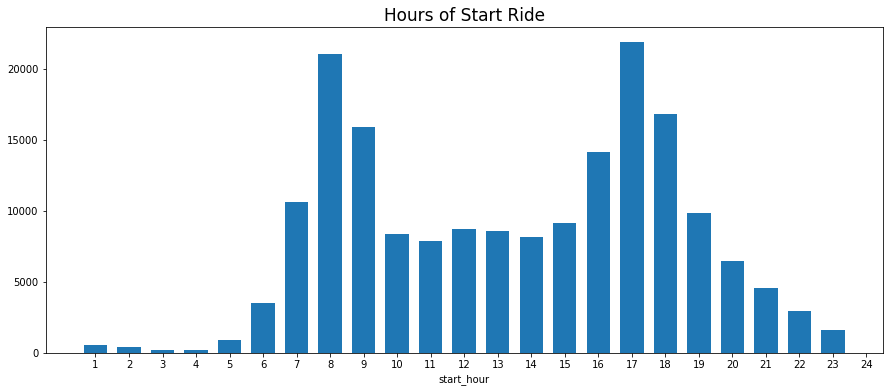

In [36]:
# i will a histogram chart to check the hour where most rides starts


plt.figure(figsize=[15,6])
bin_edges=np.arange(0.5,23.5+1, 1)
plt.hist(data=df, x = 'start_hour', bins=bin_edges, rwidth=0.7)
plt.xticks(np.arange(1,23.5+1, 1))
plt.xlabel('start_hour');
plt.title('Hours of Start Ride', fontsize=17)

from the above we can see that most rides started in the morning 7am-9am and in the evening between 4pm-7pm. this might be because most work resumes and close within those period

##### End_hour

Text(0.5,1,'Hours when Rides End')

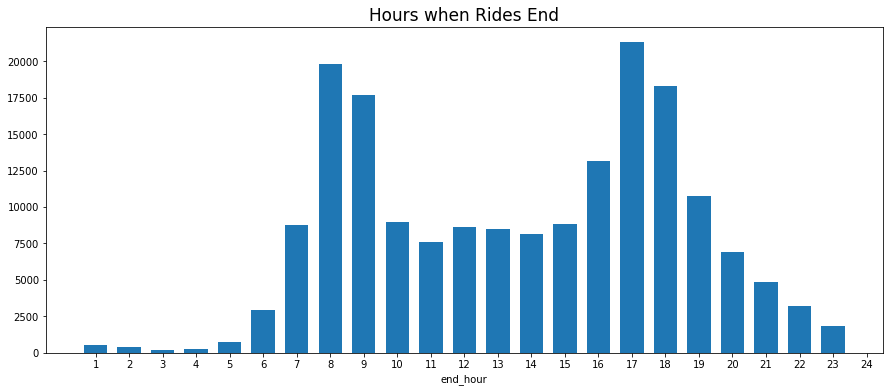

In [37]:
# i will a histogram chart to check the hour where most rides ends


plt.figure(figsize=[15,6])
bin_edges=np.arange(0.5,23.5+1, 1)
plt.hist(data=df, x = 'end_hour', bins=bin_edges, rwidth=0.7)
plt.xticks(np.arange(1,23.5+1, 1))
plt.xlabel('end_hour');
plt.title('Hours when Rides End', fontsize=17)

Since the end time looks like the start time then it is obvious that most rides did not exceed one hour

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1. > From the above visualization, we see that about 89.2% of the riders are subscribers, with just 10.8% as customers.
2. > Also, we can see that 'market St at 10th St' is the most popular start station and 'san francisco caltrain station 2 (Townsend St at 4th St)' is the most popular end station.
3. > We can also see that '16th st depot' is the most rarely used start station and 'willow St at vine St' is the most rarely used end station.
4. > We see that most trip took between 7-15 minute, with wednesdays having most rides and they begin and end mostly between the hours of 6-9am and 4-8pm.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> yes, i observed that all the rides in this dataset occured in february, which i didn't noticed when i began my analysis.

> yes, i removed some columns that i think will not be essential for my analysis and created new columns out of clustered once in other to view the necessary information in the data clearly. column creayed includes start_hour, end_hour, start_weekday, start_month and duration minutes.

## Bivariate Exploration



### Relationship between user_type and duration minutes

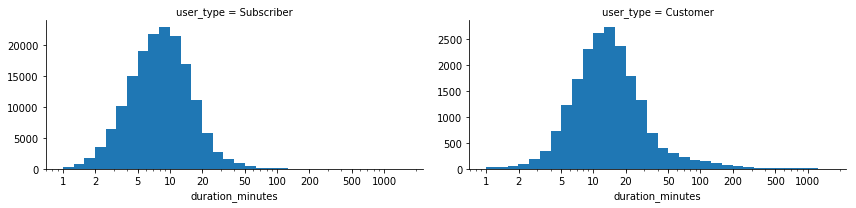

In [61]:
# facetting histograms of duration_minutes against user_type
bin_edges = 10 ** np.arange(0.0, np.log10(df.duration_minutes.max())+0.1, 0.1)
g = sb.FacetGrid(data=df, col='user_type', aspect=2, col_order=cat_comp, sharey=False)
g.map(plt.hist, "duration_minutes", bins= bin_edges)
plt.xscale('log')
tick_locs=[1,2,5,10,20,50,100,200,500,1000]
plt.xticks(tick_locs, tick_locs);





from the viz, most subscribers rode for 7-13 minutes and most customers rode for 10-15 minutes. also, more customers rode for more than one hour as compared to subscribers.

 
 
 ### Relationship between User_type and start_month

In [ ]:
# Facetting histograms of start_month against usertype

bin_edges= np.arange(0.5, 12.5+1,1)
b=sb.FacetGrid(data = df, col='user_type', aspect=2,
              col_order=cat_comp, sharey=False)
b.map(plt.hist, "start_month", bins=bin_edges, rwidth=0.7);
plt.xticks(np.arange(1, 12+1, 1), month_labels)

since all data given in the dataset are only for february then we can see that the subscribers user_type tends to ride more bikes than its customer counterpart.

### Relationship between user_type and start_weekdays

In [ ]:
# Facetting histograms of start_weekday against usertype

bin_edges= np.arange(-0.5, 6.5+1,1)
c=sb.FacetGrid(data = df, col='user_type', aspect=2,
              col_order=cat_comp, sharey=False)
c.map(plt.hist, "start_weekday", bins=bin_edges, rwidth=0.7);
plt.xticks(np.arange(0, 6+1, 1), week_labels);

subscribers uses bike mostly on weekdays with tuesday and thursday having them most rides, but there is a major reduction during weekends. for the customer part thursday and sunday seems to be the days with most rides, and unlike the subscribers, customers tend to ride more during weekends.

### Relationship between user_type and start_hour

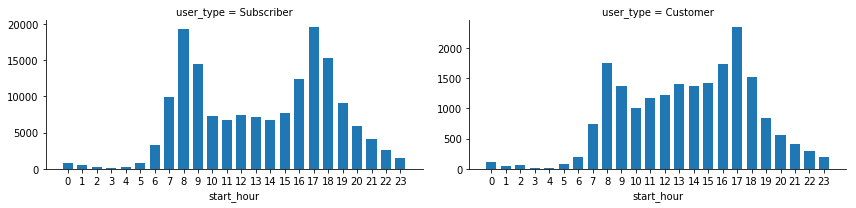

In [51]:
# Facetting histograms of start_hour against usertype

bin_edges= np.arange(-0.5, 23.5+1,1)
d=sb.FacetGrid(data = df, col='user_type', aspect=2,
              col_order=cat_comp, sharey=False)
d.map(plt.hist, "start_hour", bins=bin_edges, rwidth=0.7);
plt.xticks(np.arange(0, 23+1, 1));

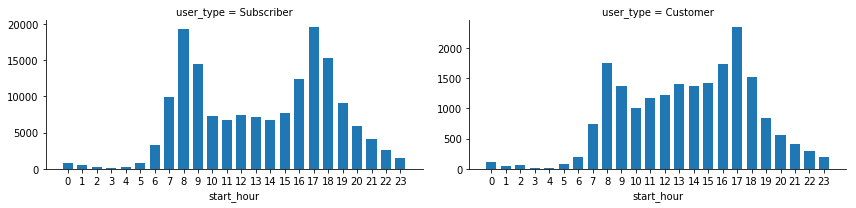

In [51]:
# Faceting histograms of start_hour against usertype

bin_edges= np.arange(-0.5, 23.5+1,1)
d=sb.FacetGrid(data = df, col='user_type', aspect=2,
              col_order=cat_comp, sharey=False)
d.map(plt.hist, "start_hour", bins=bin_edges, rwidth=0.7);
plt.xticks(np.arange(0, 23+1, 1));

the hour with in which most subscribers start riding is mostly by 8am and 5pm. but, most customers ride starts by 5pm followed by 4pm and 8am.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1. most subscribers rode for 7-13 minutes and most customers rode for 10-15 minutes.
2. more customers rode for more than one hour as compared to subscribers.
3. since all data given in the dataset are only for february then we can see that the subscribers user_type tends to ride more bikes than its customer counterpart.
4. subscribers uses bike mostly on weekdays with tuesday and thursday having them most rides, but there is a major reduction during weekends. for the customer part thursday and sunday seems to be the days with most rides, and unlike the subscribers, customers tend to ride more during weekends.
5. the hour with in which most subscribers start riding is mostly by 8am and 5pm. but, most customers ride starts by 5pm followed by 4pm and 8am.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

## Multivariate Exploration

### Duration usage in each Hour by user type

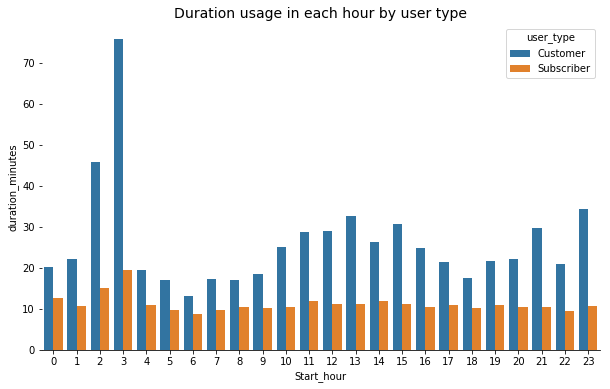

In [38]:
plt.figure(figsize=[10,6])
plt.title('Duration usage in each hour by user type', fontsize=14)
graph=sb.barplot(data=df, x='start_hour', y='duration_minutes', ci=None, hue='user_type' )


graph.set(xlabel='Start_hour', ylabel='duration_minutes')

#remove title of legend
sb.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

1. subscribers seems to have a similar duration minute not above 20 minutes, unlike that of customers.
2. customers seems to spend more time riding in each hour than subscribers.

### Were there any interesting or surprising interactions between features?

> Yes, it is strange that the average duration at 2am and 3am is higher than other hours.

## Conclusions
>I started the analysis by importing the essentials library, then i read my csv file into the notebook. i proceeded to analyse the data critically and drawing out some quality and tidiness issues which i then cleaned up. i then started with the univariate exploration part, plotting different visualizations and drawing out key insights, then i advanced to the bivariate part and i also plot some visualizations and drew out key insights which i stated beneath it.finally i plotted a multivariate plot and also drew out some key insights.



 ## reference

1. stackoverflow.com
2. geekforgeek
3. w3school
4. medium.com

In [ ]:
# export cleaned dataframe 
df.to_csv('cleaned_bike_df.csv', index=False)